In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [33]:
file_path = '..//data/translated/raw_data.csv'
df = pd.read_csv(file_path)
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [34]:
df.shape

(162980, 2)

In [35]:
df.rename(columns={'clean_text': 'text', 'category': 'sentiment'}, inplace=True)

In [36]:
df.replace({'sentiment': {-1: 0, 0: 2}}, inplace=True)

In [37]:
df.dropna(inplace=True)
df.shape

(162969, 2)

In [38]:
class_distribution = df['sentiment'].value_counts(normalize=True) * 100
print(class_distribution)


1.0    44.332971
2.0    33.878222
0.0    21.788806
Name: sentiment, dtype: float64


<AxesSubplot: >

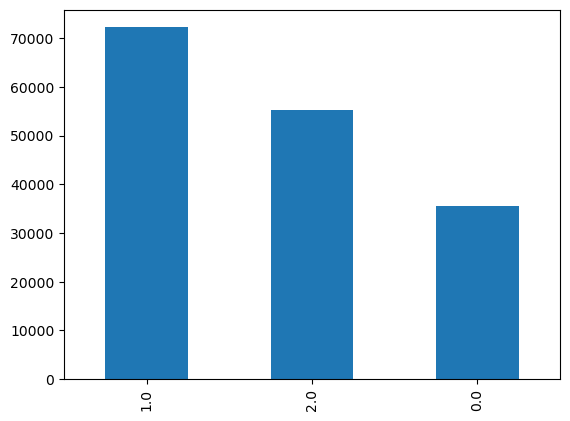

In [39]:
df.sentiment.value_counts().plot(kind='bar')

In [40]:
for sentiment in df['sentiment'].unique():
    example = df[df['sentiment'] == sentiment].iloc[0]
    print(f"Sentiment: {sentiment}, Example Text: {example['text']}")


Sentiment: 0.0, Example Text: when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples
Sentiment: 2.0, Example Text: talk all the nonsense and continue all the drama will vote for modi 
Sentiment: 1.0, Example Text: what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax


In [41]:
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
average_length = df['text_length'].mean()
print(f"Average Tweet Length: {average_length} words")


Average Tweet Length: 20.08070246488596 words


In [42]:
mean_std_per_class = df.groupby('sentiment')['text_length'].agg(['mean', 'std'])
print(mean_std_per_class)


                mean        std
sentiment                      
0.0        23.880622  10.307720
1.0        22.652673  10.598821
2.0        14.271105   9.075172


In [43]:
df.to_csv('../data/translated/train.csv', index=False)
